<a href="https://colab.research.google.com/github/ArtyomHov/tensorflow-zero-to-mastery/blob/master/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we are going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few typs of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating a data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000
# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42
)

In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

### Our data is a little hard to understand right now... let's visualize it.

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


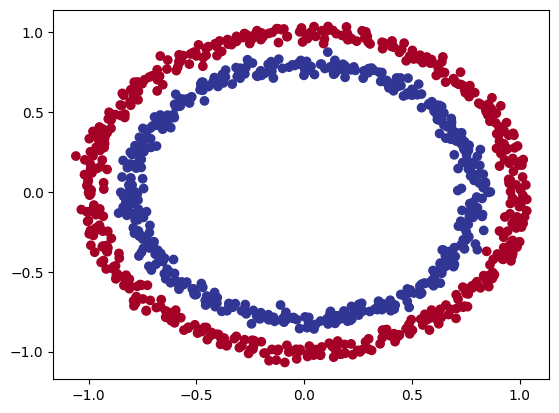

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.RdYlBu)

## Input and output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we are working with
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with Tensorflow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [ ]:
import tensorflow as tf
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.9395 - accuracy: 0.4840
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.8447 - accuracy: 0.4690
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 4.3750 - accuracy: 0.4680
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 2.5553 - accuracy: 0.4810
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7292 - accuracy: 0.5000


In [ ]:
# Let's try and improve our model training longer
model_1.fit(X, y, epochs = 200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

#### Since we are working on a binary classification problem and our model is getting around 50% percent accuracy... it's performing as it's gueassing.

So let's step thinga up a notch and add an extra layer

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs = 100, verbose=0)

In [ ]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932404637336731, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might add more layers or increase hidden units within a layer
2. Compiling the model - here we might to choose a different optimization function such as Adam instead of SGD
3. Fitting the model - perhaps we might fit our model for more epochs (leave it training for longer).

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time with 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7021 - accuracy: 0.5100


[0.7021270990371704, 0.5099999904632568]

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


To visualize our model predictions let's create a function `plot_decision_boundary()`, this function will:
* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as line between zones (where each unique class falls).

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots decision bundary created by a model predicting on X.
  """
  # Define the axes bundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - -0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max),
                       np.linspace(y_min, y_max))

  # Create X values (we are going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classificarion")
    # We have to reshape our prediction to get ready them for plotting
    y_pred =  np.argmax(y_pred, axis = 1).rehape(xx.shape)
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

79/79 [==============================] - 0s 1ms/step
doing binary classification


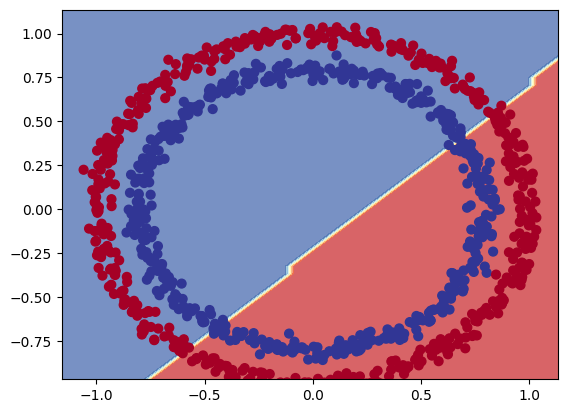

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [ ]:
# Let's see if our model can be used for a regression problem
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(1, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to regression data
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None


Oh wait... we compiled our model for a binary classification problem.

But we are now working on a regression problem. Let's change the model to suit our data.

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 493.6269 - mae: 493.6269
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 381.8716 - mae: 381.8716
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 273.5745 - mae: 273.5745
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 159.9708 - mae: 159.9708
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 56.6882 - mae: 56.6882
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 82.1537 - mae: 82.1537
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 82.4242 - mae: 82.4242
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 50.5970 - mae: 50.5970
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 48.8290 - mae: 48.8290
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 47.1584 - mae: 47.1584
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 4ms/step


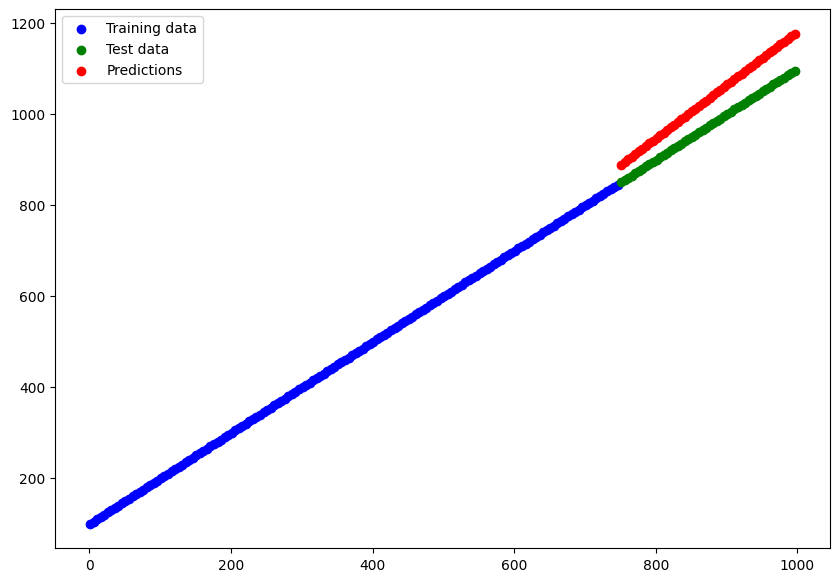

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the models predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label = 'Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label = 'Test data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label = 'Predictions')
plt.legend()

## The missing pace: Non-linearity

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.5136 - accuracy: 0.4900
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.5119 - accuracy: 0.4900
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.5012 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4998 - accuracy: 0.4910
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4976 - accuracy: 0.4910
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4966 - accuracy: 0.4910
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4824 - accuracy: 0.4910
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4753 - accuracy: 0.4910
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4752 - accuracy: 0.4910
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.4750 - accuracy: 0.4910
Epoch 11/

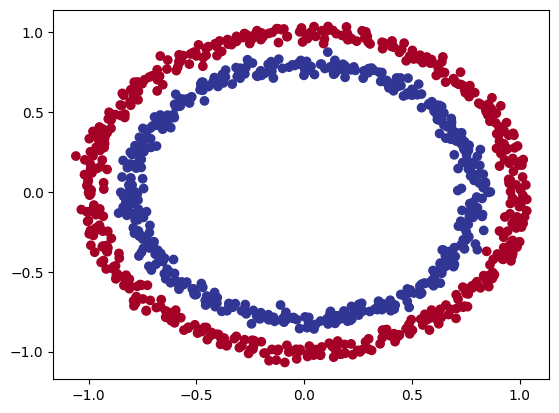

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)


79/79 [==============================] - 0s 1ms/step
doing binary classification


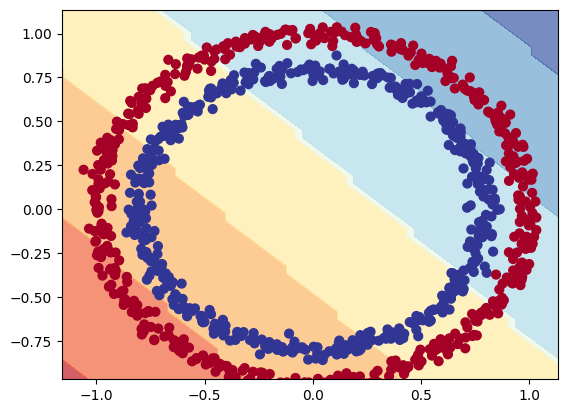

In [ ]:
# Check the desicion boundary for our latest model
plot_decision_boundary(model = model_4, X=X, y=y)


### Let's try to build our first model with non-linear activation function

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.1999 - accuracy: 0.4870
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1955 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1680 - accuracy: 0.4890
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1406 - accuracy: 0.4890
Epoch 5/100
32/32 [==============================] - 0s 11ms/step - loss: 6.1375 - accuracy: 0.4890
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 6.1360 - accuracy: 0.4890
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1350 - accuracy: 0.4890
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1339 - accuracy: 0.4890
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1330 - accuracy: 0.4890
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1322 - accuracy: 0.4890
Epoch 11

In [ ]:
# Time to replicate the multilayer neural network from TensorFlow playground in code...

# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 4.8358 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 3.8304 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 3.5997 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 3.4824 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 3.3059 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 2.8433 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0996 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9336 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9009 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8771 - accuracy: 0.4970
Epoch 11/

In [ ]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2140 - accuracy: 0.9290


[0.2139889895915985, 0.9290000200271606]

79/79 [==============================] - 0s 1ms/step
doing binary classification


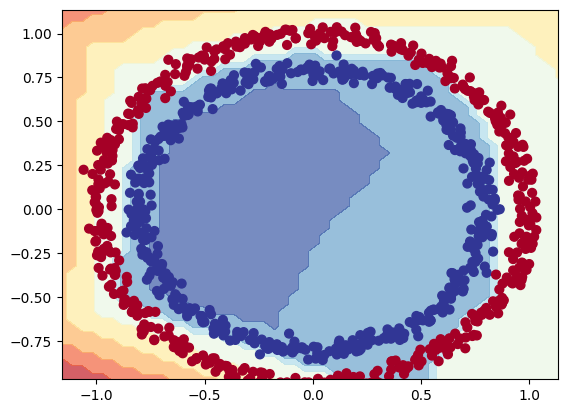

In [ ]:
# How do our model predictions look
plot_decision_boundary(model_6, X, y)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6876 - accuracy: 0.5090
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.5080
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6806 - accuracy: 0.5250
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6793 - accuracy: 0.5370
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6781 - accuracy: 0.5330
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6765 - accuracy: 0.5720
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6753 - accuracy: 0.5760
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6739 - accuracy: 0.5800
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.5830
Epoch 11/

In [ ]:
# 4. Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.9820


[0.24966542422771454, 0.9819999933242798]

79/79 [==============================] - 0s 1ms/step
doing binary classification


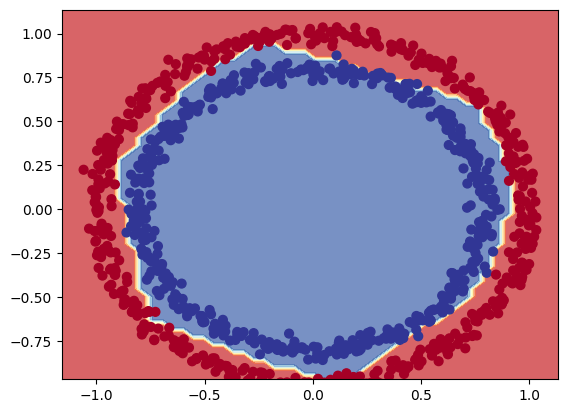

In [ ]:
# Let's visualize our metrics
plot_decision_boundary(model_7, X, y)

In [ ]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

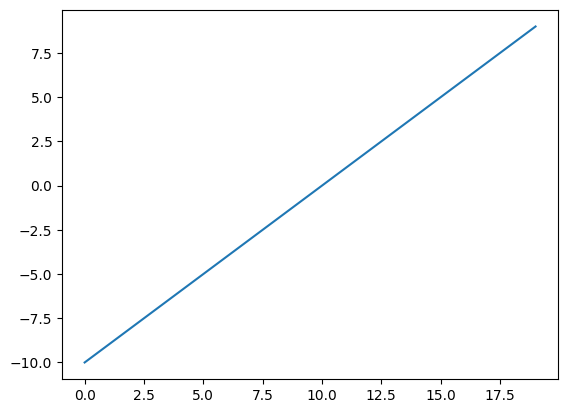

In [ ]:
# Visualize our toy tensor
plt.plot(A)

In [ ]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

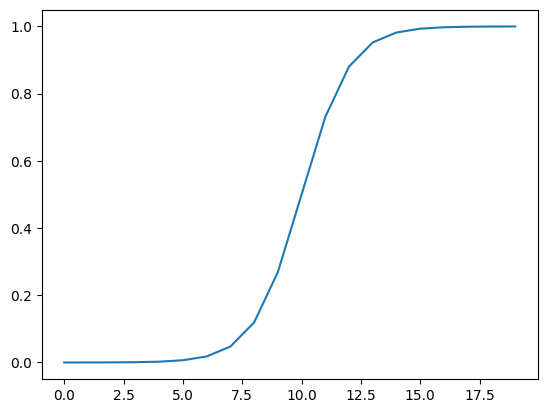

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [ ]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

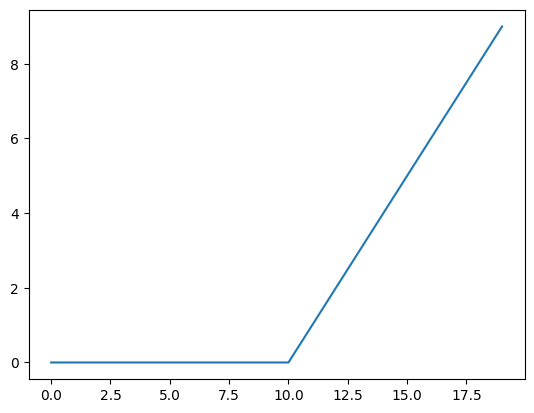

In [ ]:
# Plot relu modified tensor
plt.plot(relu(A))

In [ ]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

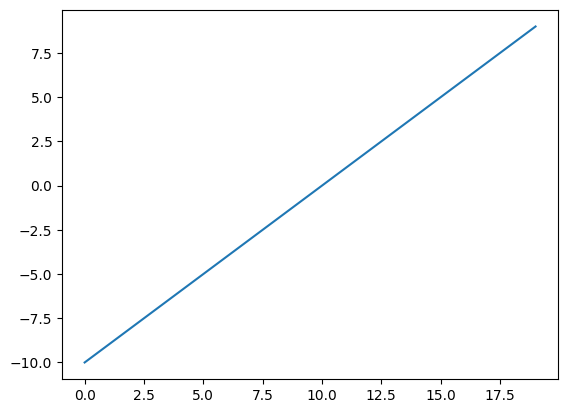

In [ ]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))


In [ ]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

So far, we've been training and testing on the same dataset.

However, in machine learning this is basically a sin.

So, let's create a training and test set.

In [ ]:
# Check how many examples we have
len(X)

1000

In [ ]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Let's create a model to fit on the training data and evaluate on the testing data

# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 4ms/step - loss: 0.6966 - accuracy: 0.4787
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5150
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.5263
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6808 - accuracy: 0.5562
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6765 - accuracy: 0.5487
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6685 - accuracy: 0.5500
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6571 - accuracy: 0.6062
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6448 - accuracy: 0.6162
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6304 - accuracy: 0.6438
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6089 - accuracy: 0.6625
Epoch 11/25
25/25 [

In [ ]:
# Evaluate the model on test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.3075 - accuracy: 0.8650


[0.30753976106643677, 0.8650000095367432]

79/79 [==============================] - 0s 2ms/step
doing binary classification
79/79 [==============================] - 0s 1ms/step
doing binary classification


<function matplotlib.pyplot.show(close=None, block=None)>

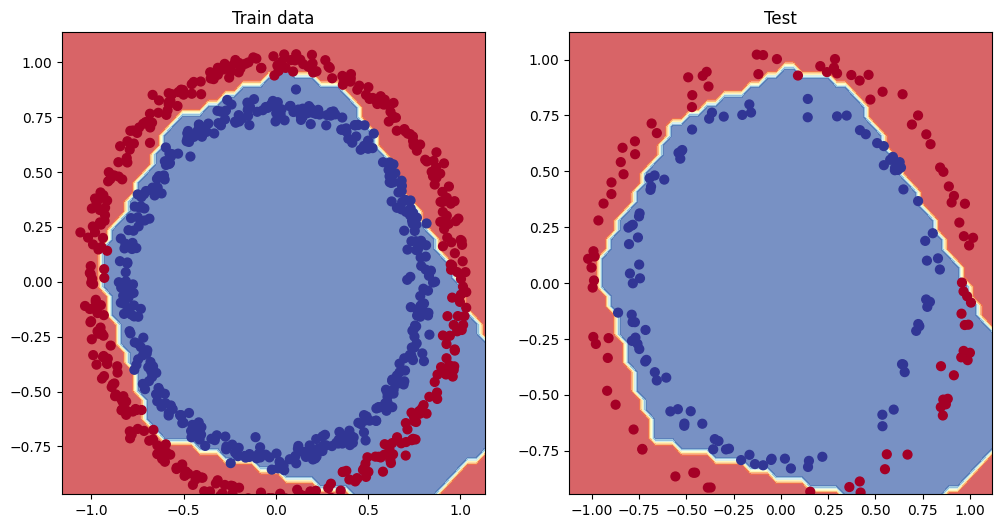

In [ ]:
# Plot the decision boundaries for training and test datasets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train data')
plot_decision_boundary(model=model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model=model_8, X=X_test, y=y_test)
plt.show

## Plot the loss (or training) curves

In [ ]:
 # Convert the history object into a DataFrame
 pd.DataFrame(history.history)

,loss,accuracy
0,0.696591,0.47875
1,0.689476,0.51500
2,0.685908,0.52625
3,0.680814,0.55625
4,0.676480,0.54875
5,0.668463,0.55000
6,0.657069,0.60625
7,0.644796,0.61625
8,0.630405,0.64375
9,0.608874,0.66250


Text(0.5, 1.0, 'Model_8 loss curves')

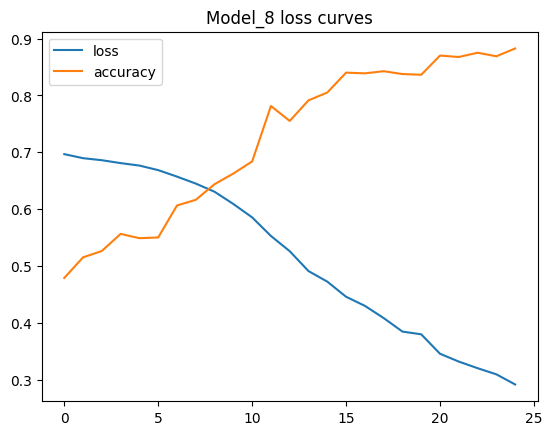

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curves')

**Note** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we are going to use the following steps:
* A learning rate  **callback** - you can think of callback as an extra piece of functionality you can add to your model while training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# 2. Compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model
history_9 = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6902 - accuracy: 0.5075 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5100 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5100 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5100 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5113 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5113 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5125 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5138 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

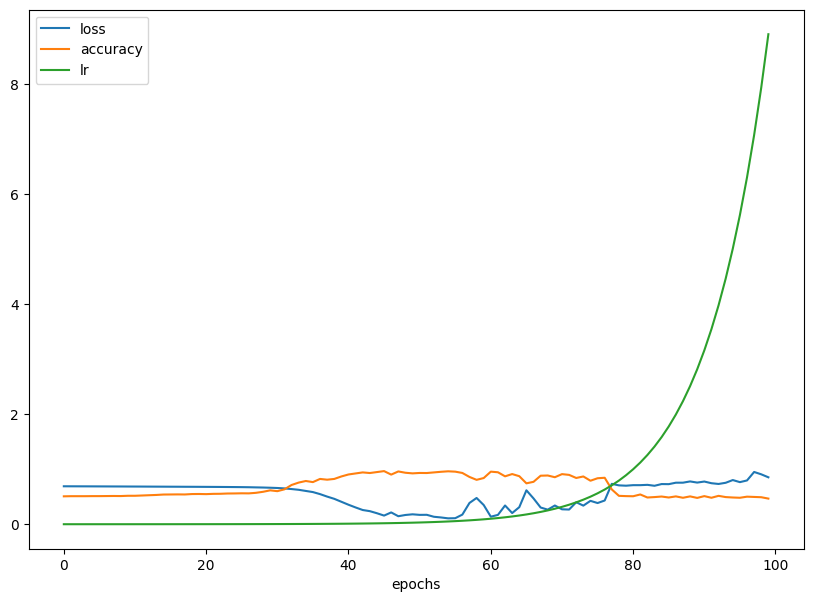

In [ ]:
# heckout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel='epochs')

Text(0.5, 1.0, 'Learning rate vs loss')

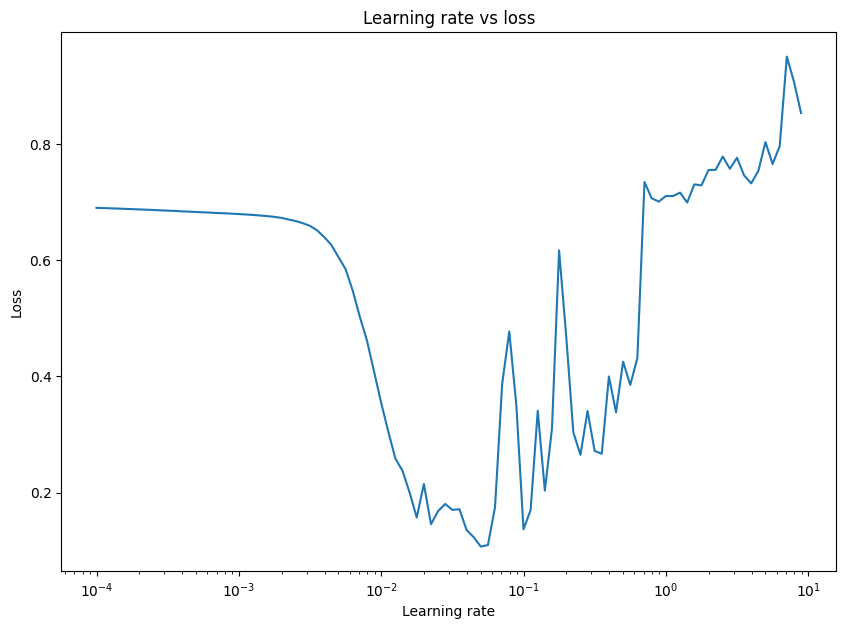

In [ ]:
# Plot the learning rate vs loss
lrs = 1e-4 * (10**(tf.range(100) /  20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs loss')

In [ ]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Let's try using a higher **ideal** learning rate with the same model as before

# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model with the ideal lerning rate
model_10.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=['accuracy'])

# 3. Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.7125 - accuracy: 0.4787
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4988
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.4900
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5138
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6816 - accuracy: 0.5700
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.5288
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6713 - accuracy: 0.5537
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6479 - accuracy: 0.5925
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6109 - accuracy: 0.6662
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5543 - accuracy: 0.7362
Epoch 11/20
25/25 [

In [ ]:
# evaluate model 10 on test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3147 - accuracy: 0.8850


[0.31469035148620605, 0.8849999904632568]

In [ ]:
# Evaluate model 8 on test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.3075 - accuracy: 0.8650


[0.30753976106643677, 0.8650000095367432]

79/79 [==============================] - 0s 1ms/step
doing binary classification
79/79 [==============================] - 0s 2ms/step
doing binary classification


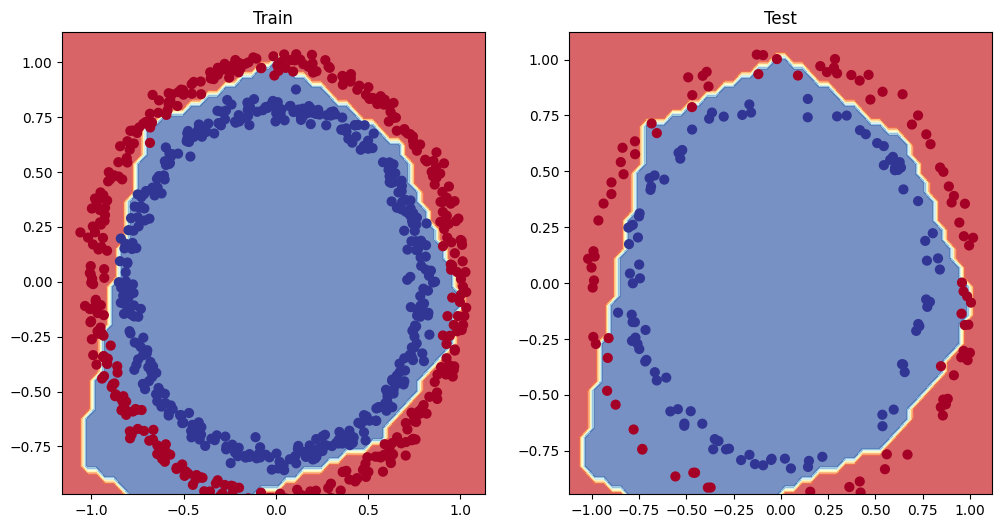

In [ ]:
# Plot the decision boudaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model=model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model=model_10, X=X_test, y=y_test)

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods and metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy * 100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.3147 - accuracy: 0.8850
Model loss on the test set: 0.31469035148620605
Model accuracy on the test set: 88.50%


###How about a confusion matrix?

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create a confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
y_test[:10], y_preds[:10]

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]),
 array([[0.81296307],
        [0.81296307],
        [0.81296307],
        [0.81296307],
        [0.1954698 ],
        [0.04898147],
        [0.81296307],
        [0.0949678 ],
        [0.81296307],
        [0.01454438]], dtype=float32))

Oops... looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions.

In [ ]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[78, 23],
       [ 0, 99]])

## How about we pretify our confusion matrix?

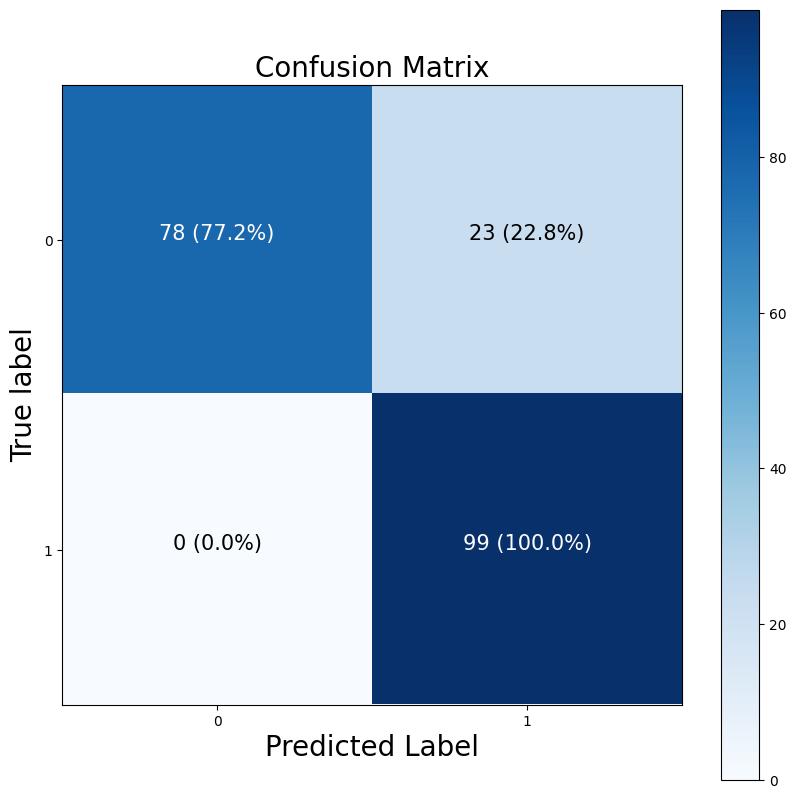

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of scikit learn's plot_confusion_matrix.

import itertools

figsize = (10, 10)

# Create a confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's pretify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title='Confusion Matrix',
       xlabel='Predicted Label',
       ylabel='True label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to the bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set the threshold for different colors
threshold = (cm.max() + cm.min( )) / 2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
           horizontalalignment='center',
           color = 'white' if cm[i, j] > threshold else 'black',
           size=15)

## Working with a larger example (multiclass classification)

When you have more than 2 classes as option it is known as **multi-class classification**.
* This mean if you have 3 different classes, it is a multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()



4422102/4422102 [==============================] - 0s 0us/step


In [11]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [12]:
# Check the shape of single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

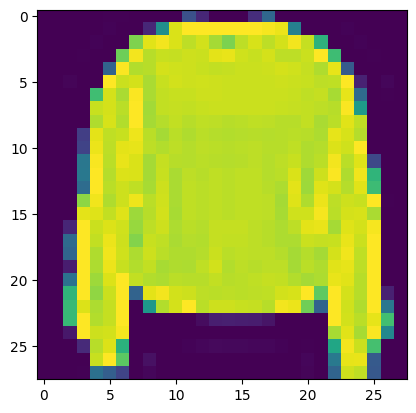

In [13]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [14]:
# Check out samples label
train_labels[7]

2

In [15]:
# Create  a small list so we can index onto our training labels so they're human readable.
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Cost", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Bag')

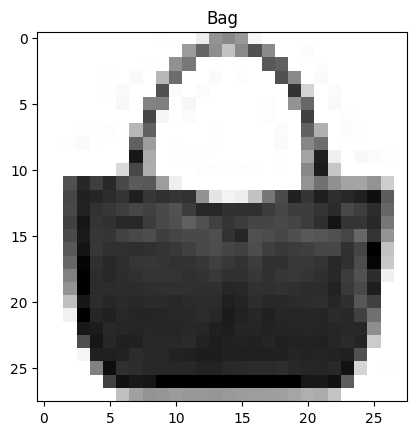

In [16]:
# Plot an example image and its label
index_of_choice = 100
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

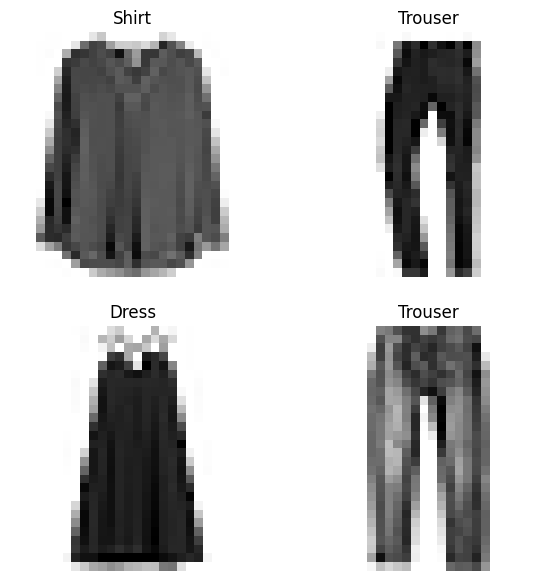

In [17]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model we can use a similar architecture to our binary classifiers, however, we are going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CatgericalCrossentropy()
  * If your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)


In [18]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

# 2. Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# 3. Fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10) ,
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3327 - accuracy: 0.0978 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [19]:
# Our dtata needs to be needs to be flattened (from 28 * 28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [20]:
# Check the model summary
model_11.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 4)                 3140      
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# check the min and max values of training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalaized), this means they like to have the numbers in the tensors they try to find patterns in netween 0 and 1.

In [22]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum.
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [23]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create a model same as model_11
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics='accuracy')

# Fit the model
norm_hiatory = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels)
                            )

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2469 - accuracy: 0.4999 - val_loss: 0.8899 - val_accuracy: 0.6677
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7764 - accuracy: 0.7252 - val_loss: 0.7221 - val_accuracy: 0.7563
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6488 - accuracy: 0.7781 - val_loss: 0.6635 - val_accuracy: 0.7676
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6105 - accuracy: 0.7861 - val_loss: 0.6349 - val_accuracy: 0.7798
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5927 - accuracy: 0.7915 - val_loss: 0.6153 - val_accuracy: 0.7819
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5820 - accuracy: 0.7941 - val_loss: 0.6165 - val_accuracy: 0.7807
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5735 - accuracy: 0.7965 - val_loss: 0.6378 - val_accuracy:

**Note** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1)

<Axes: title={'center': 'Normalized data'}>

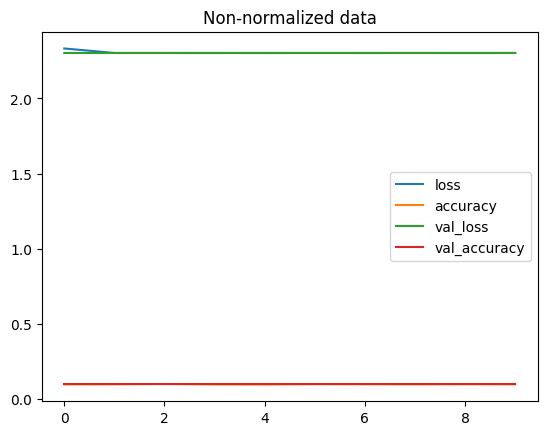

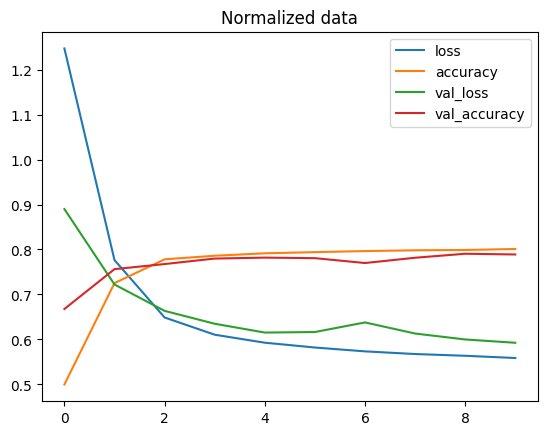

In [24]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# plot normalized data loss curves
pd.DataFrame(norm_hiatory.history).plot(title="Normalized data")

**NOTE** The same model with even *slightly* different data can produce dramatically different results. When you are comparing models it's important to make sure you're comparing them on the samw criteria (e.g. same architecture but different data or same data but different architecture)

## Finding the ideal learning rate

In [25]:
# Set random seed.
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics='accuracy')

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0955 - accuracy: 0.6008 - val_loss: 0.7604 - val_accuracy: 0.7249 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6933 - accuracy: 0.7506 - val_loss: 0.6831 - val_accuracy: 0.7649 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6275 - accuracy: 0.7846 - val_loss: 0.6330 - val_accuracy: 0.7851 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5857 - accuracy: 0.8003 - val_loss: 0.5975 - val_accuracy: 0.7944 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5550 - accuracy: 0.8086 - val_loss: 0.5764 - val_accuracy: 0.7979 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5303 - accuracy: 0.8166 - val_loss: 0.5680 - val_accuracy: 0.8063 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'Finding the ideal learning rate.')

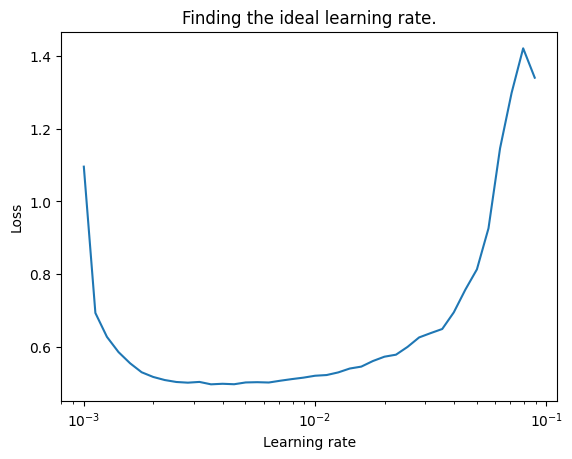

In [26]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate.')

In [ ]:
# Let's refit the model with ideal learning rate
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 )

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4234 - val_loss: 1.1425
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9680 - val_loss: 0.8761
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7796 - val_loss: 0.7660
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7006 - val_loss: 0.7131
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6654 - val_loss: 0.7179
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6450 - val_loss: 0.6858
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6316 - val_loss: 0.7129
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6192 - val_loss: 0.6688
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6110 - val_loss: 0.6626
Epoch 10/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.602

## Evaluating our multiclass classification model

To evaluate our multiclass classification model we could:

* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for usi in an application.

Let's go through the top 2...

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of scikit learn's plot_confusion_matrix.

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create a confusion matrix
  cm = confusion_matrix(y_true, y_preds)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's pretify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  #Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title='Confusion Matrix',
        xlabel='Predicted Label',
        ylabel='True label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to the bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min( )) / 2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
            horizontalalignment='center',
            color = 'white' if cm[i, j] > threshold else 'black',
            size=text_size)

In [ ]:
class_names

In [ ]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for "predicition probabilities"

# View the first predictions
y_probs[:5]

**NOTE** Remember to make predictions on the same kind of data your model was trained on (e.g. If your model was trained on normalized data, you'll want to make predictions on normalized data.)

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

In [ ]:
test_labels

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

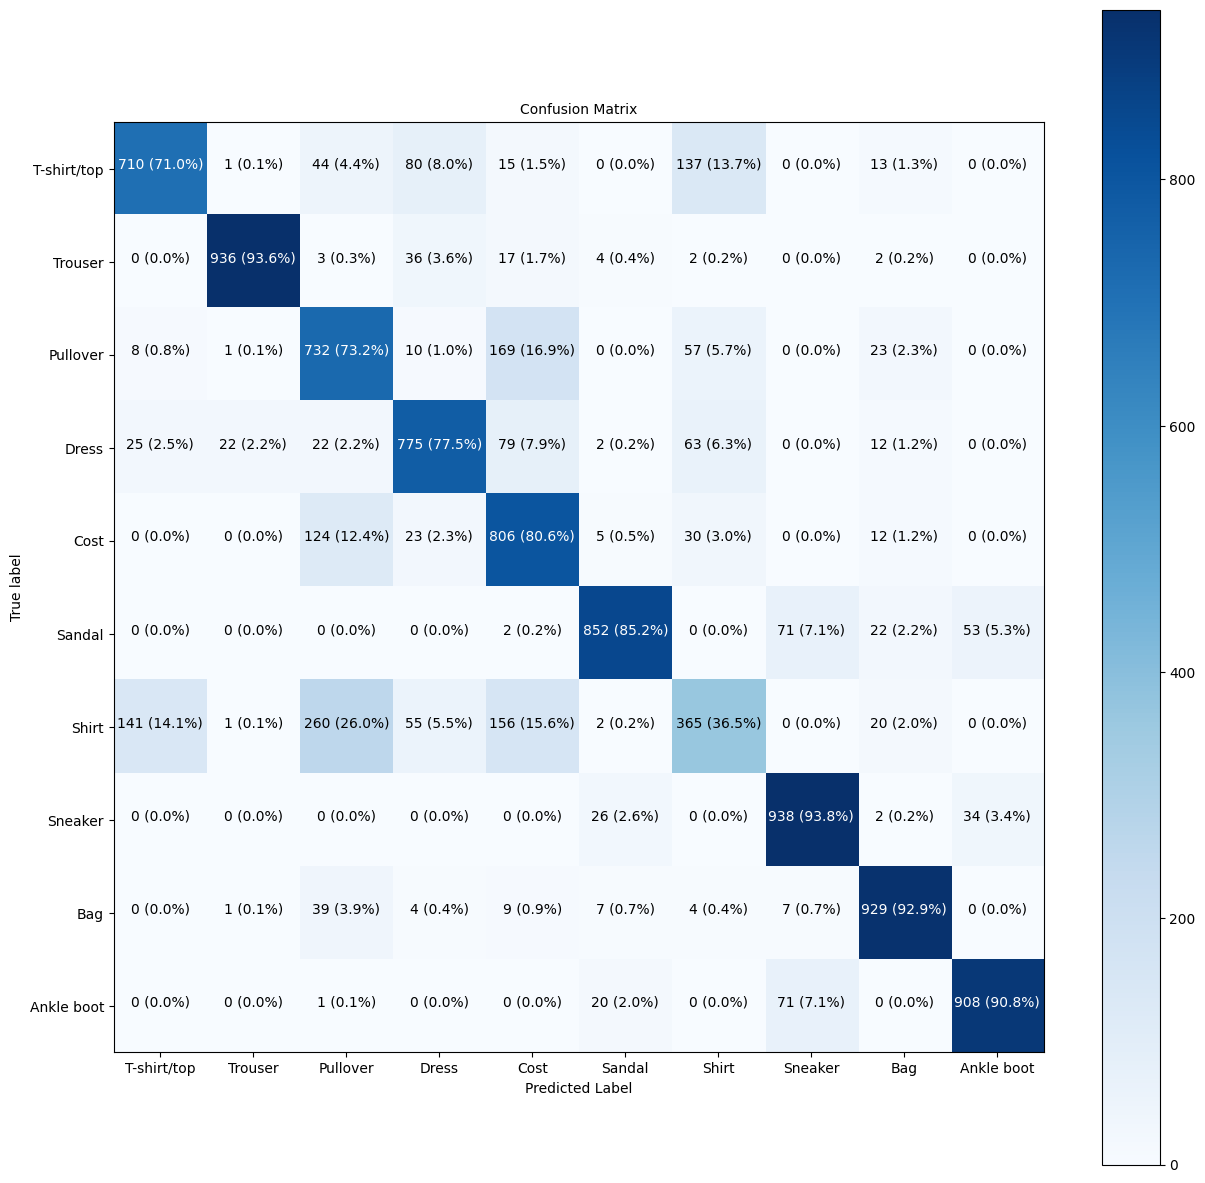

In [38]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10
)

**NOTE:** Often when working with image or other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your model.
How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the ruth label and the predicted label.

In [40]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  picks a random image, plots it and labels it with a prediction and true label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction right or wrong.
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # Set the color green or red based on if prediction right or wrong

1/1 [==============================] - 0s 22ms/step


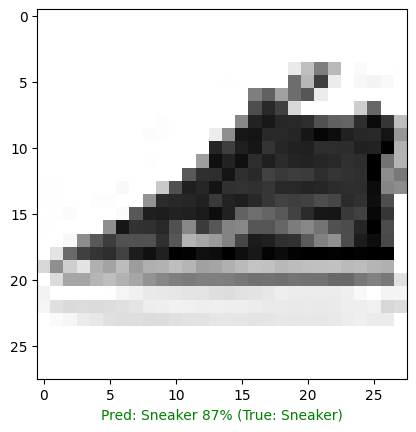

In [62]:
# Check out a random image as well as prediction
plot_random_image(model=model_14,
                  images=test_data_norm, # always make predictions on the same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [63]:
# Find the layers of our most recent model
model_14.layers

In [64]:
# Extract a particular layer
model_14.layers[1]

In [68]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.31851807,  0.4742856 ,  0.9055825 , -0.03949177],
        [ 0.43529406, -0.11106678,  1.1061363 ,  1.1069795 ],
        [ 0.9920283 ,  0.66279596,  0.13828777,  1.1958524 ],
        ...,
        [ 0.37161258,  0.546895  ,  0.09363978,  0.20920649],
        [ 0.9843394 ,  0.431659  ,  0.85797787,  0.7168946 ],
        [ 1.476761  ,  0.797024  ,  1.1151611 , -0.08811989]],
       dtype=float32),
 (784, 4))

In [70]:
model_14.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 4)                 3140      
                                                                 
 dense_16 (Dense)            (None, 4)                 20        
                                                                 
 dense_17 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Now let's check out the bias vector.

In [72]:
# Bias and biases shapes
biases, biases.shape

(array([1.0810577, 2.0366697, 2.459806 , 2.3280175], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector also get initialized as zeros (at least in the case of a Tensorflow dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [73]:
model_14.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 4)                 3140      
                                                                 
 dense_16 (Dense)            (None, 4)                 20        
                                                                 
 dense_17 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


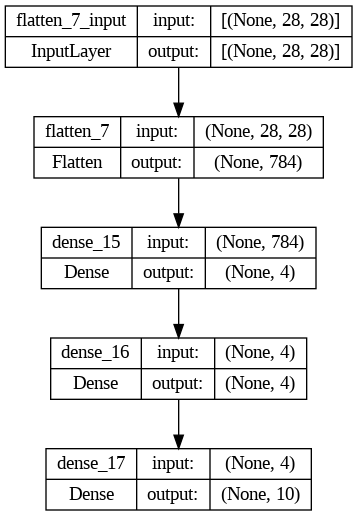

In [75]:
# let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)